In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

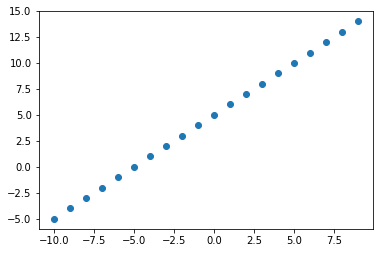

In [5]:
x = np.arange(-10, 10)
m = 1
c = 5
y = m * x + c
plt.scatter(x, y)

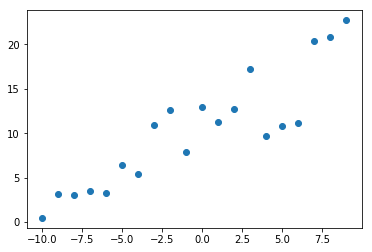

In [9]:
np.random.seed(0)
noise = np.random.random(len(x))

ynoise = m*x + c + 10 * noise

plt.scatter(x, ynoise)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform',activation='linear'))

/home/lt83/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  


In [40]:
model.compile(optimizer='sgd', loss='mse')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
weights = model.layers[0].get_weights()
#print(weights)

w_init = weights[0]
b_init = weights[1][0]

print(w_init, b_init)

[[ 0.96039641]] 10.2653


In [38]:
model.fit(x, ynoise, nb_epoch=100)

/home/lt83/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 7.8638
Epoch 2/100
20/20 [==============================] - 0s 136us/step - loss: 7.8628
Epoch 3/100
20/20 [==============================] - 0s 102us/step - loss: 7.8617
Epoch 4/100
20/20 [==============================] - 0s 112us/step - loss: 7.8607
Epoch 5/100
20/20 [==============================] - 0s 66us/step - loss: 7.8596
Epoch 6/100
20/20 [==============================] - 0s 89us/step - loss: 7.8586
Epoch 7/100
20/20 [==============================] - 0s 69us/step - loss: 7.8575
Epoch 8/100
20/20 [==============================] - 0s 78us/step - loss: 7.8565
Epoch 9/100
20/20 [==============================] - 0s 68us/step - loss: 7.8554
Epoch 10/100
20/20 [==============================] - 0s 67us/step - loss: 7.8544
Epoch 11/100
20/20 [==============================] - 0s 121us/step - loss: 7.8533
Epoch 12/100
20/20 [==============================] - 0s 70us/step - loss: 7.8523
Epoch 13/100
20/20 [==

In [51]:
weights_new = model.layers[0].get_weights()
#print(weights)

w_final = weights_new[0]
b_final = weights_new[1][0]
y_pred = w_final[0][0]*x

print(w_final, b_final)

[[ 0.96208245]] 10.3619


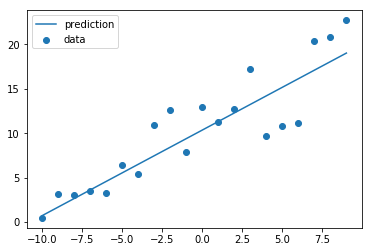

In [52]:
plt.scatter(x, ynoise, label='data')
plt.plot(x, y_pred + b_final, label='prediction')
plt.legend()
plt.show()